In [4]:
from libs.search import *
import matplotlib.pyplot as plt
from PIL import Image

In [5]:

def plot_NQueens(solution, fig = None):
    n = len(solution)
    board = np.array([2 * int((i + j) % 2) for j in range(n) for i in range(n)]).reshape((n, n))
    im = Image.open('images/queen_s.png')
    height = im.size[1]
    # im = im.resize((int(100 / n), int(100 / n)))
    im = np.array(im).astype(float) / 255
    fig = plt.figure(figsize=(7, 7)) if fig is None else fig
    ax = fig.add_subplot(111)
    ax.set_title('{} Queens'.format(n))
    plt.imshow(board, cmap='binary', interpolation='nearest')
    # NQueensCSP gives a solution as a dictionary
    if isinstance(solution, dict):
        for (k, v) in solution.items():
            newax = fig.add_axes([0.064 + (k * 0.112), 0.062 + ((n - v) * 0.112), 0.1, 0.1], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    # NQueensProblem gives a solution as a list
    elif isinstance(solution, list):
        for (k, v) in enumerate(solution):
            l = 7/n
            newax = fig.add_axes([0.064 + (k * 0.896/n),((n - v) * 0.896/n) - 0.5/n + n*0.002, 0.8/n, 0.8/n], zorder=1)
            newax.imshow(im)
            newax.axis('off')
    fig.tight_layout()
    plt.show()
    # return fig
    

C:\Users\mahma\AppData\Local\Temp\ipykernel_12796\2076050087.py:25: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


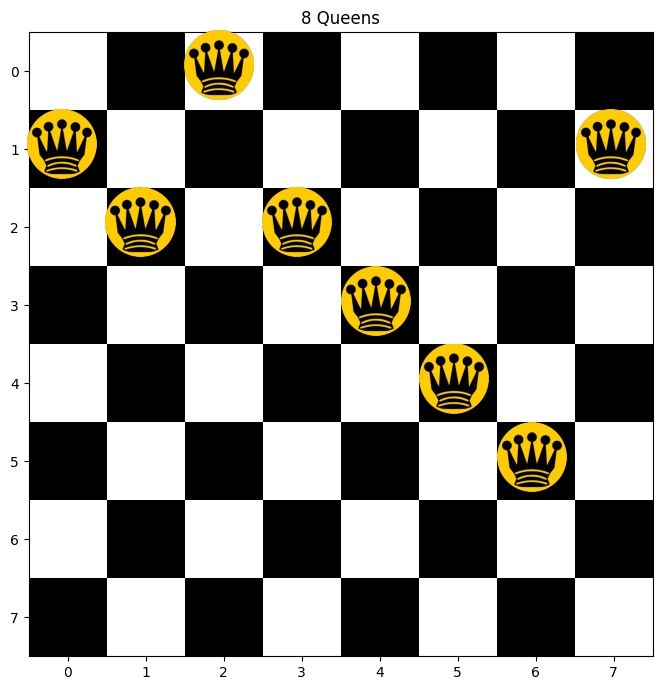

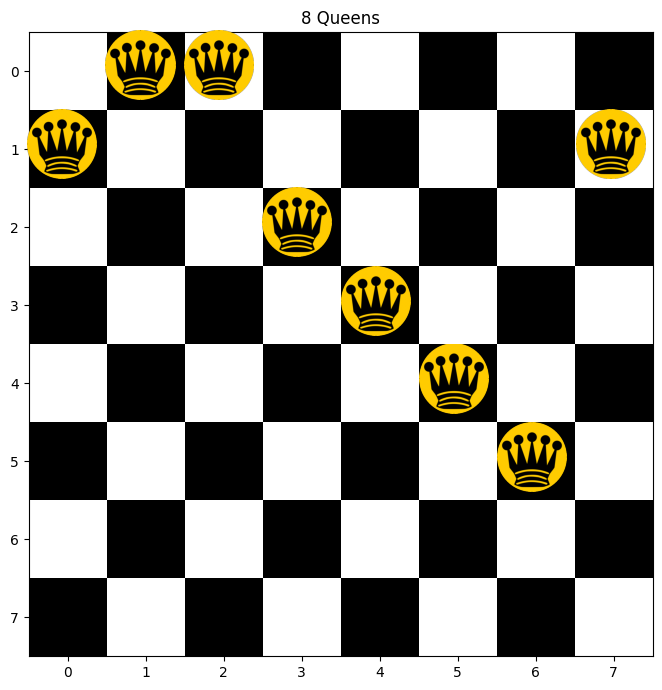

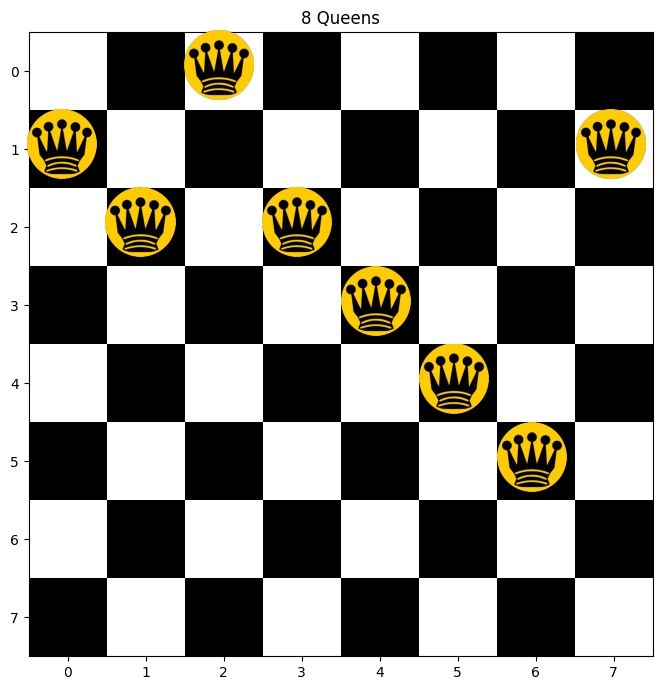

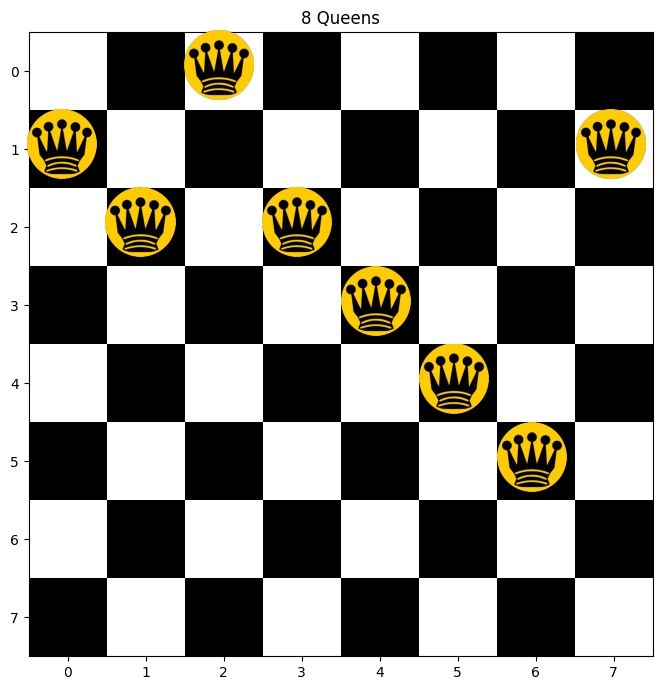

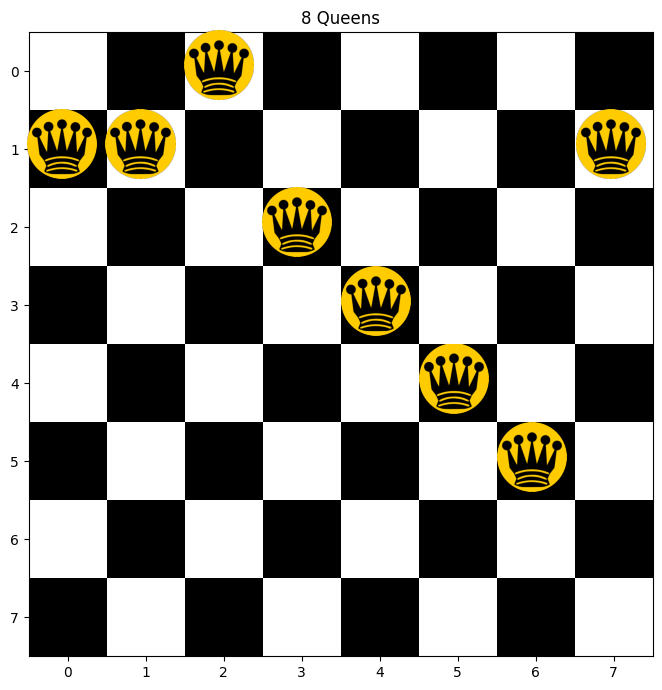

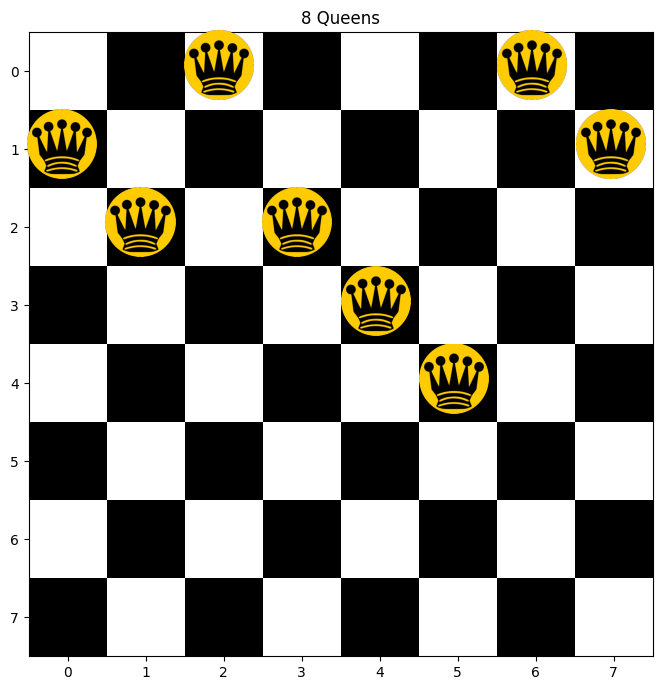

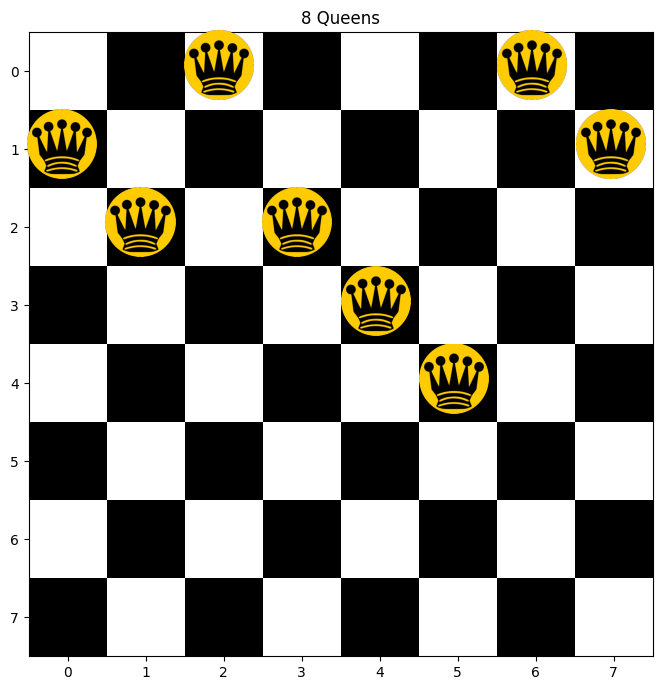

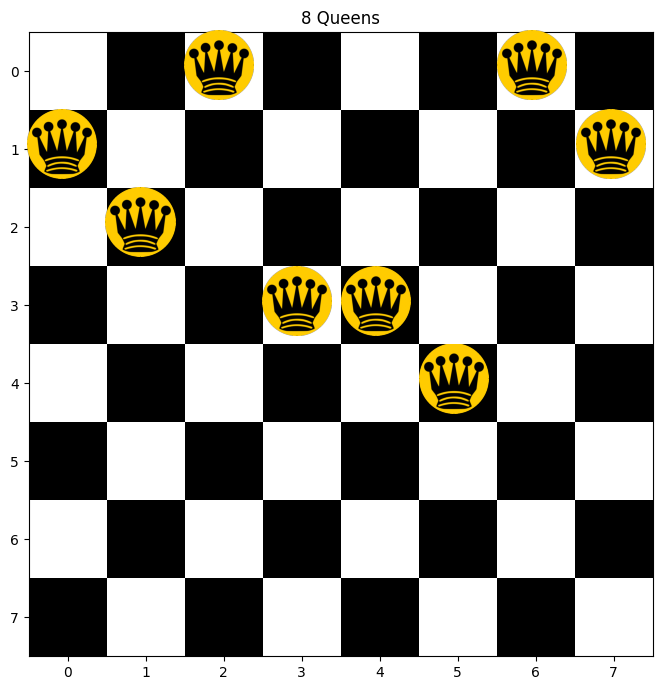

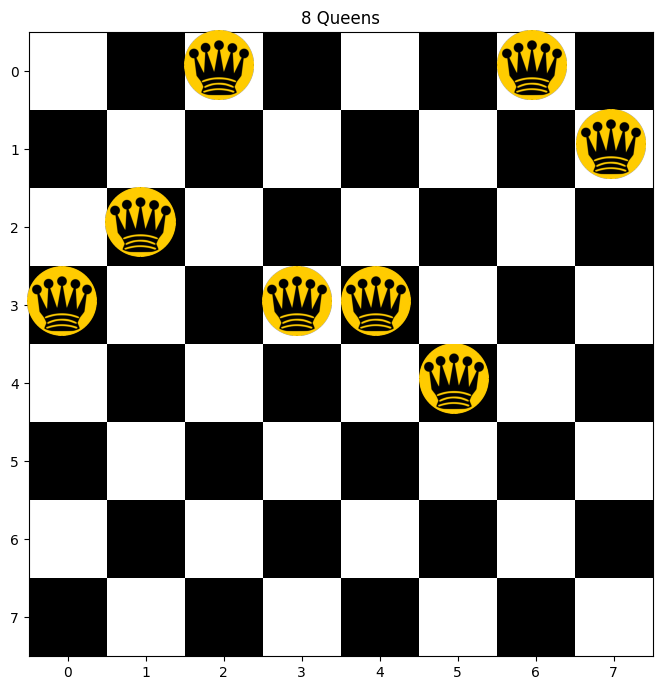

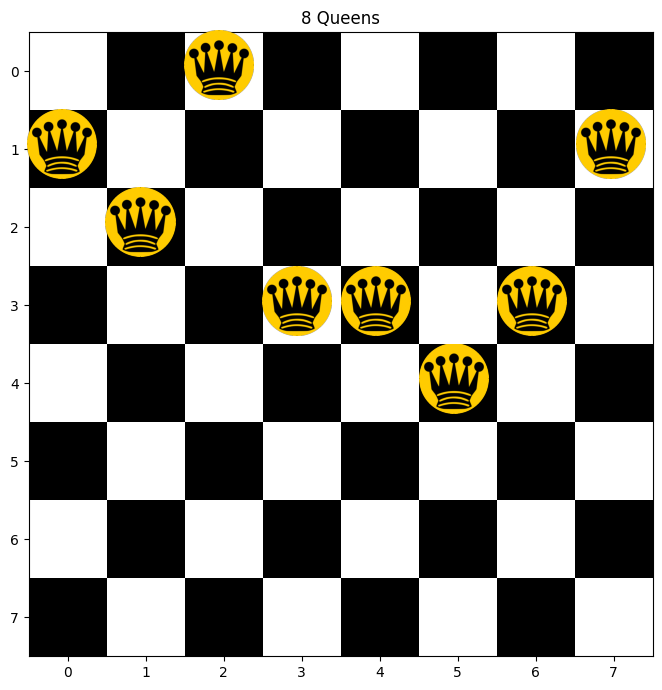

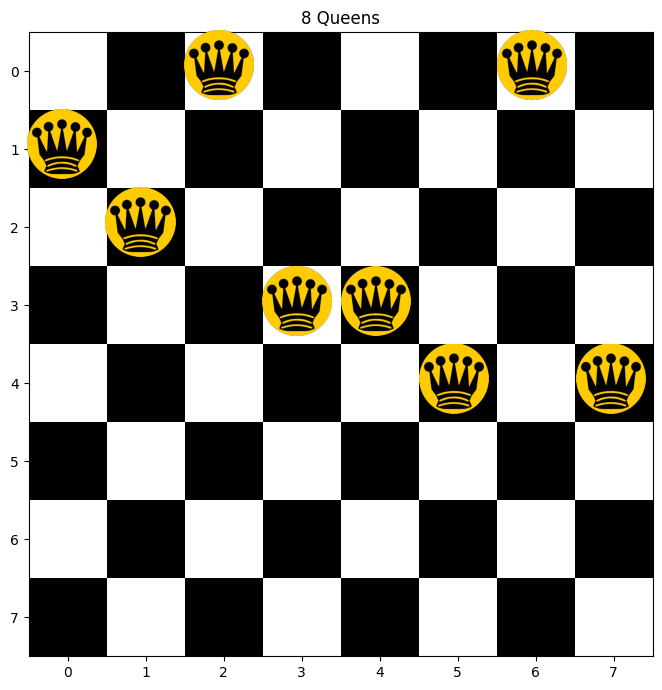

Final solution: [1, 2, 0, 3, 3, 4, 0, 4]
Attacking pairs in final solution: 6


In [6]:
import random

"""
Use this block to do your assignment
"""
initial_state = [1,2,0,2,3,4,5,1] #do not use this state. Initialize random position to each queen.
nqp = NQueensProblem(len(initial_state)) #give number of queens as an argument.
plot_NQueens(initial_state) # to print the state everytime something changes. You can give an array of position of each queen.


def generate_random_state():
    return initial_state

def compute_attacking_pairs(board):
    attacking_pairs = 0
    for i in range(len(board)):
        for j in range(i+1, len(board)):
            if board[i] == board[j] or abs(i - j) == abs(board[i] - board[j]):
                attacking_pairs += 1
    return attacking_pairs

def successor_function(board):
    new_board = list(board)
    col = random.randint(0, 7)
    row = random.randint(0, 7)
    new_board[col] = row
    return new_board

def hill_climbing():
    i = 0
    
    current_state = generate_random_state()
    current_value = compute_attacking_pairs(current_state)
    
    while current_value > 0:
        i = i + 1
        successor = successor_function(current_state)
        plot_NQueens(successor)
        successor_value = compute_attacking_pairs(successor)
        
        if successor_value < current_value:
            current_state = successor
            current_value = successor_value
        
        if i == 10:
            break
    
    return current_state

# Testing
random.seed(42)  # Setting controlled seed for reproducibility
solution = hill_climbing()
print("Final solution:", solution)
print("Attacking pairs in final solution:", compute_attacking_pairs(solution))
